#Import Libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import numpy as np

from tensorflow.keras.layers import Dense,Dropout

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

#Import Data

In [24]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [25]:
df.shape

(517, 31)

In [26]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [27]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [28]:
df.info

<bound method DataFrame.info of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0

In [29]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [31]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


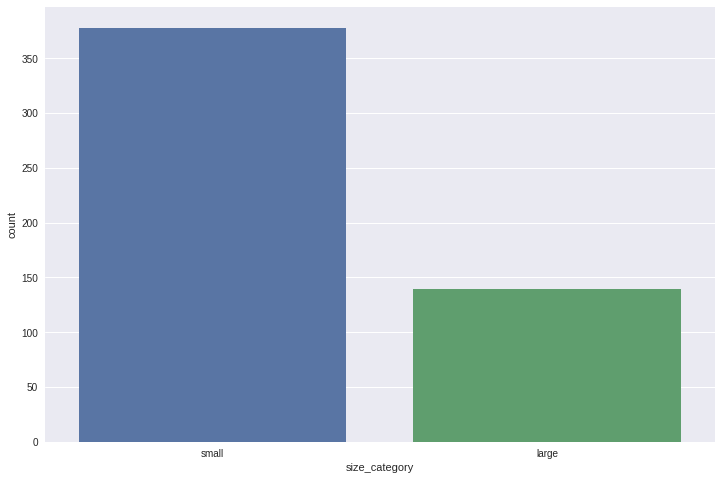

In [32]:
sns.countplot(df['size_category'])
plt.show()

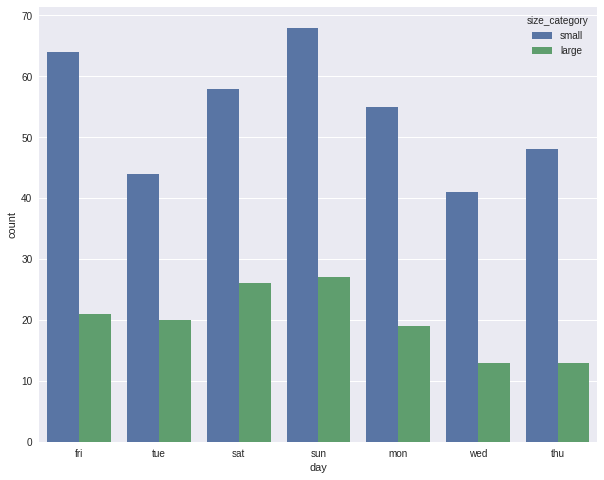

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x = df['day'],hue= df['size_category'])
plt.show()

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["month"] = label_encoder.fit_transform(df["month"])
df["day"] = label_encoder.fit_transform(df["day"])
df["size_category"] = label_encoder.fit_transform(df["size_category"])

In [35]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
X = df.iloc[:,:11]
Y = df.iloc[:,-1]

In [37]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [38]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

#ANN Model


In [39]:
model = Sequential()
model.add(layers.Dense(50, input_dim=11,  activation='relu'))
model.add(layers.Dense(11,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [41]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 10ms/step - loss: 3.8208 - acc: 0.5751 - val_loss: 2.9934 - val_acc: 0.6842
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 1.2714 - acc: 0.7601 - val_loss: 0.9089 - val_acc: 0.7135
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.7939 - acc: 0.7746 - val_loss: 0.7116 - val_acc: 0.7018
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4985 - acc: 0.8150 - val_loss: 0.4477 - val_acc: 0.8304
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4176 - acc: 0.8439 - val_loss: 0.5224 - val_acc: 0.8012
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2576 - acc: 0.8844 - val_loss: 0.3290 - val_acc: 0.8596
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3154 - acc: 0.8786 - val_loss: 0.2916 - val_acc: 0.8947
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2756 - 

In [42]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1665 - acc: 0.9439
acc: 94.39%


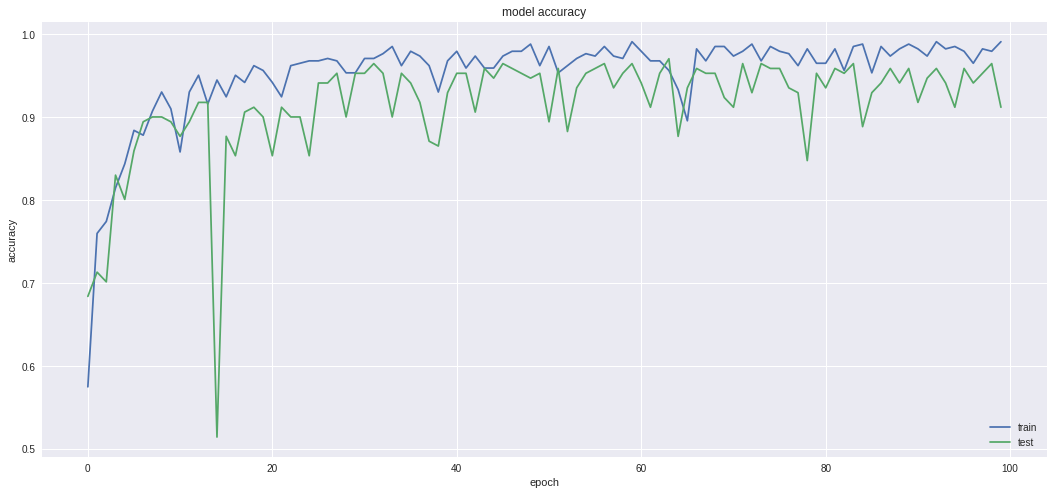

In [55]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize=(18,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

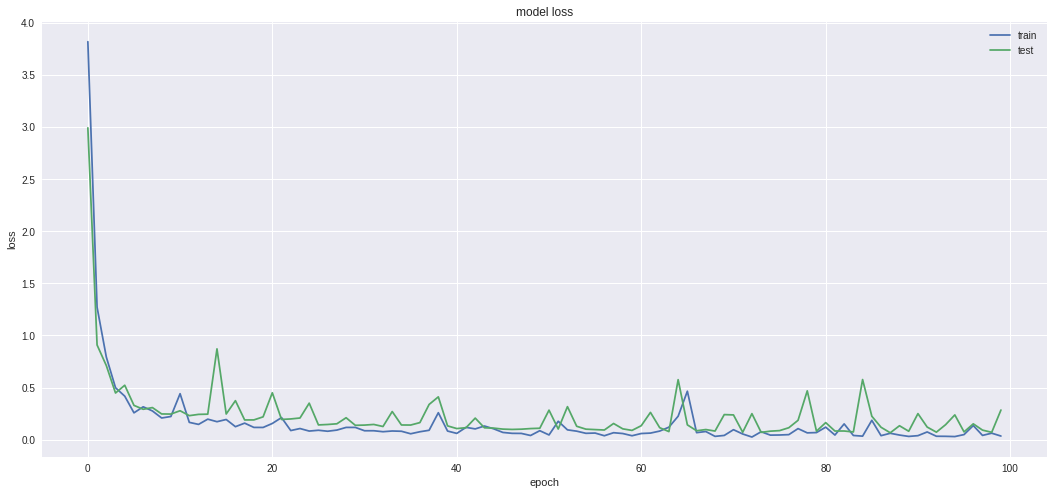

In [53]:
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()